# **Lab 4: Approximation**
**Kevin Arnmark**

# **Abstract**

In this report I implement an algorithm for approximating functions of one variable.

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [ ]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [1]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

from scipy import integrate

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

In this report I will construct the following algorithm:


  **Function:** L2 projection to pw linear approximation over mesh in 1D

  **Input:** function f(x), 1D mesh with nodes (x0,...,xn)

  **Output:** vector of L2 projection of f(x) evaluated in (x0,...,xn) 

  **Test:** verify accuracy and convergence rate against exact function



# **Method**

**L2 Projection to pw linear approximation over mesh in 1D**

**assemble_system**

The assemble algorithm is based on Algorithm 9.2 in Chapter 9.4

**integrate_matrix**

Integrating $(\phi_i, \phi_j)$ can be done as in equations (9.17 - 9.19) where the result is $\frac{h}{3}$ if $i=j$ and $\frac{h}{6}$ if  $\lvert i-j \rvert = 1$, where h is the length of an interval if the interval is uniformly subdivided.

**integrate_vector**

Integrating the vector is done by using the function integrate from the library scipy for the function $f(x)*\phi_i(x)$. This could also be approximated in other ways.

**l2_projection**

The final part of solving $\alpha$ from $A\alpha=b$ is done using numpy, because it is easiest, but it is also possible to use one of the algorithms in the previous labs to solve this.


In [72]:
def get_no_local_shape_functions(k, n):
  return 2

def integrate_vector(f, k, i, mesh):
  h = mesh[k+i] - mesh[k-i+1]
  return integrate.quad(lambda x: f(x)*(x - mesh[k-i+1])/h, mesh[k], mesh[k+1])[0]

def integrate_matrix(k, i, j, mesh):
  h = 0
  if k == 0:
    h = mesh[k + 1] - mesh[k]
  else:
    h = mesh[k] - mesh[k - 1]
  if i == j:
    return h/3
  elif j == i + 1:
    return h/6
  elif j == i - 1:
    return h/6

def assemble_system(f, mesh):
  n = len(mesh)
  b = np.zeros(n)
  A = np.zeros((n, n))
  for k in range(n - 1):
    q = get_no_local_shape_functions(k, n)
    b_l = np.zeros(q)
    A_l = np.zeros((q,q))
    for i in range(q):
      b_l[i] = integrate_vector(f, k, i, mesh)
      for j in range(q):
        A_l[i,j] = integrate_matrix(k, i, j, mesh)
    b[k:k+q] += b_l
    A[k:k+q, k:k+q] += A_l
  return A, b

def l2_proj(f, mesh):
  A, b = assemble_system(f, mesh)
  return np.linalg.solve(A, b)


# Tests:

Here I test the accuracy of the algorithm with two functions and with varying amounts of elements in the mesh. 

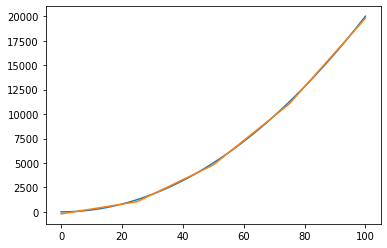

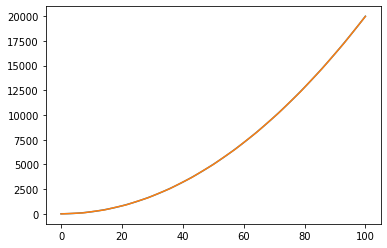

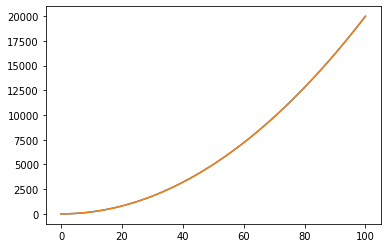

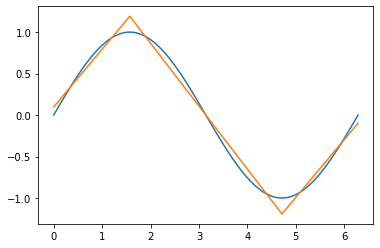

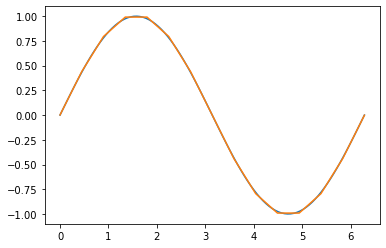

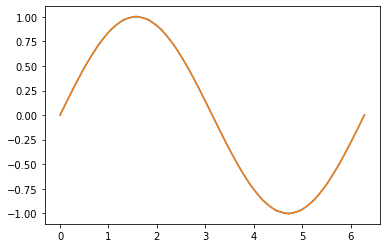

In [73]:
x = np.linspace(0,100,100)
fnc = lambda x: 2*x**2

for res in range(5, 35, 10):
  mesh = np.linspace(0, 100, res)
  alpha = l2_proj(fnc, mesh)
  plt.plot(x, fnc(x))
  plt.plot(mesh, alpha)
  plt.show()

x = np.linspace(0,2*np.pi,100)
fnc = lambda x: np.sin(x)

for res in range(5, 35, 10):
  mesh = np.linspace(0, 2*np.pi, res)
  alpha = l2_proj(fnc, mesh)
  plt.plot(x, fnc(x))
  plt.plot(mesh, alpha)
  plt.show()





# **Results**

The results are as expected and it does not require that many elements in the mesh to be able to give a good approximation. Increasing the number of elements in the mesh high enough and it begins to get hard to see any difference between the real function and the approximated one.

# **Discussion**

If I had more time I would have liked to switch out the data structure of the A matrix to CRS format since it is a sparse matrix. This could give better performance and reduce the memory needed for approximations with large amounts of elements.